In [130]:
import pandas as pd
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.preprocessing import MinMaxScaler,
import numpy as np
import matplotlib.pyplot as plt

In [131]:
PATH = r"C:\Users\Tong Chen Rong\Desktop\cleague\data\Fifa 23 Players Data.csv"

In [132]:
df = pd.read_csv(PATH)

In [133]:
df.head(20)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,...,34,35,34,32,34,32,32,32,32,90
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,47,53,47,39,46,39,38,37,38,90
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,37,...,87,81,87,65,62,65,61,56,61,23
9,V. van Dijk,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,...,73,79,73,83,88,83,85,90,85,23


In [134]:
positions = df["Best Position"].unique()

In [135]:
CAM = df[df["Best Position"] == "CAM"]

In [136]:
Y = CAM["CAM Rating"]

In [137]:
FEATURE_NAMES = ['Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'Goalkeeper Diving', 'Goalkeeper Handling', ' GoalkeeperKicking',
       'Goalkeeper Positioning', 'Goalkeeper Reflexes']

In [138]:
X = CAM[FEATURE_NAMES]

In [139]:
model = LassoCV(cv=5, max_iter=5000)
clf = model.fit(X, Y)

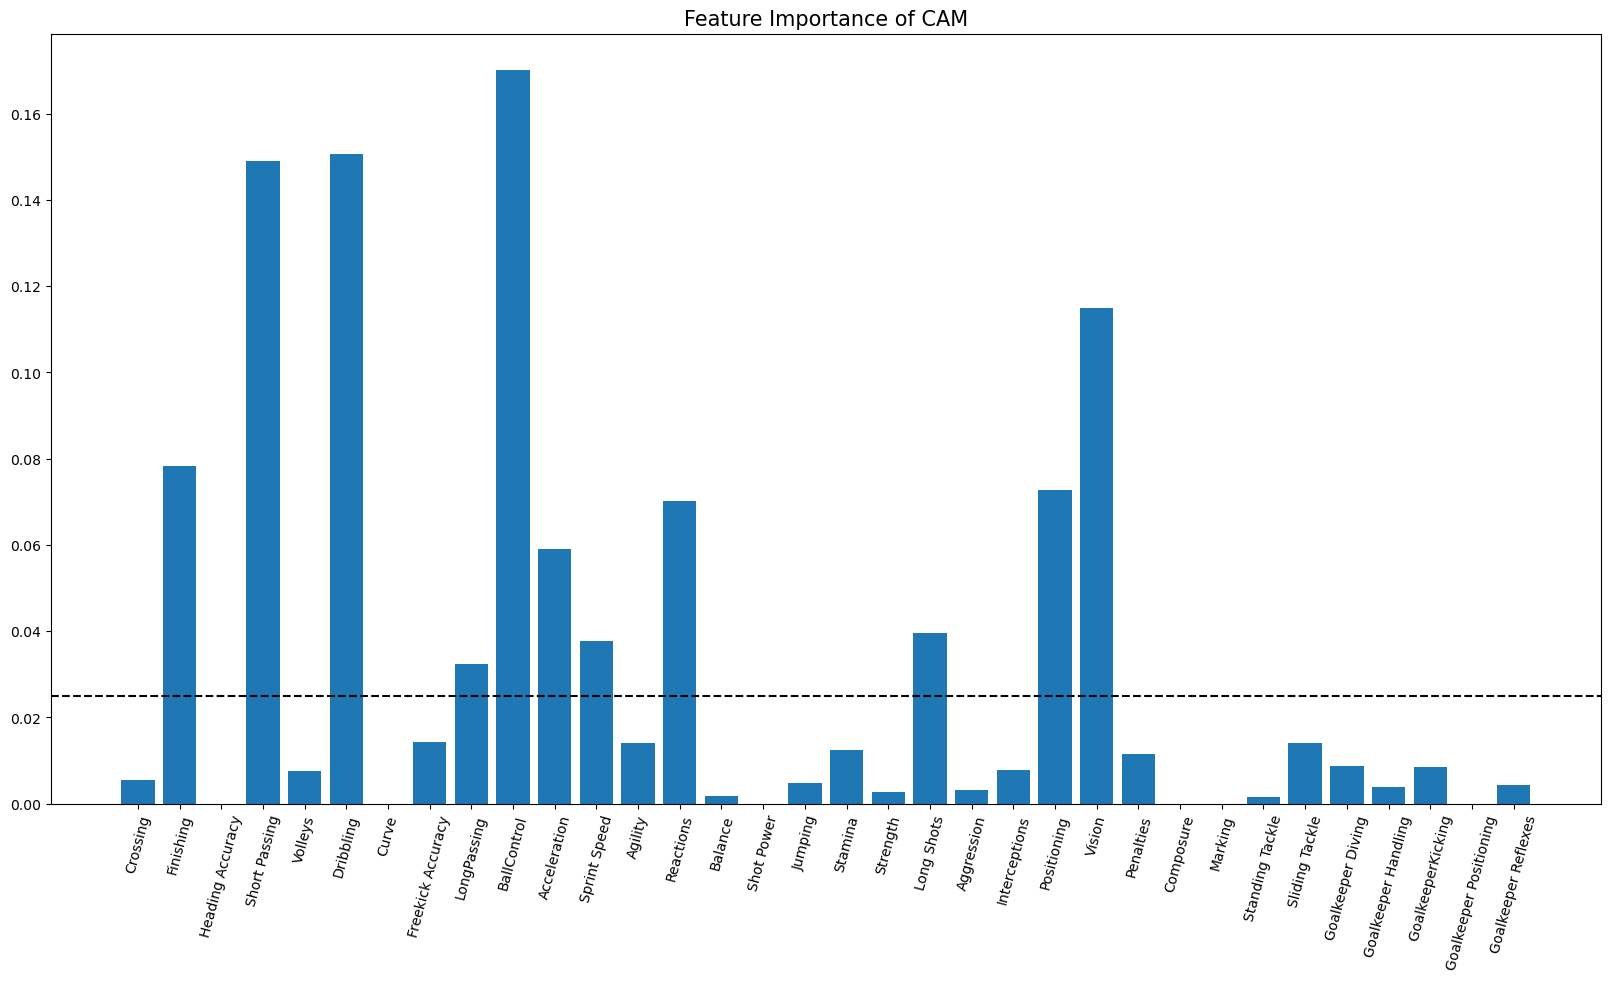

In [140]:
importance = pd.Series(np.abs(clf.coef_))
plt.figure(figsize=(20,10))
plt.bar(x = FEATURE_NAMES, height=importance)
plt.xticks(rotation = 75)
plt.axhline(y=0.025, color='k', linestyle='--')
plt.title("Feature Importance of {}".format("CAM"), fontdict={'fontsize':15})
plt.show()

In [141]:
np.sum(importance)

1.1002255247453263

In [142]:
model2 = LinearRegression()
clf2 = model2.fit(X, Y)

In [ ]:
clf2.coef_

In [171]:
def calculateImportance(positionCode:str):
       players = df[df["Best Position"] == positionCode]
       y = players[positionCode + ' Rating']
       X = players[FEATURE_NAMES]
       model = LassoCV()
       clf = model.fit(X, y)
       importance = np.abs(clf.coef_).tolist()
       plt.figure(figsize=(20,15))
       plt.bar(x = FEATURE_NAMES, height=importance)
       plt.xticks(rotation = 75)
       plt.axhline(y=0.025, color='k', linestyle='--')
       plt.title("Feature Importance of {}".format(positionCode), fontdict={'fontsize':15})
       plt.savefig("./figures/{}_featureimportance.png".format(positionCode))
       plt.close()
       return importance

In [172]:
calculateImportance("LW")

[0.10013793774858476,
 0.0828732839399072,
 0.006304885506478689,
 0.07129880525726874,
 0.007427740106477945,
 0.17665162877877388,
 0.0,
 0.0036172610567816116,
 0.0,
 0.145504558079556,
 0.057390638766785525,
 0.06688574739002265,
 0.019363832069798758,
 0.07113461928507012,
 0.008085706847787706,
 0.009824948847641532,
 0.003043249215937426,
 0.009908483496832978,
 0.004006975063262144,
 0.017489146624464248,
 0.002994596167230318,
 0.0005429062181598772,
 0.09175361286527149,
 0.0730988908122595,
 0.0,
 0.0014389258225998693,
 0.0007411740720831806,
 0.0026669411007823993,
 0.0,
 0.01412005412281407,
 0.01529156290569971,
 0.0,
 0.002883359315624517,
 0.0]

In [173]:
role_weights = pd.DataFrame(index=positions, columns=FEATURE_NAMES)
for role in positions:
       role_weights.loc[role] = calculateImportance(role)

In [169]:
# role_weights.loc["CAM", :]

In [174]:
role_weights

,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes
CAM,0.005458,0.078258,0.0,0.149039,0.007621,0.150559,0.0,0.014378,0.032409,0.170041,...,0.0115,0.0,0.0,0.001553,0.013952,0.008606,0.003828,0.008545,0.0,0.00428
CF,0.036481,0.105508,0.006299,0.076423,0.002509,0.110475,0.0,0.0,0.011789,0.19305,...,0.009819,0.0,0.0,0.005041,0.0,0.0,0.0,0.0,0.0,0.0
ST,0.008423,0.225021,0.09095,0.063236,0.000014,0.07971,0.0,0.010574,0.001914,0.121737,...,0.008641,0.013144,0.003661,0.001177,0.001197,0.004967,0.005106,0.010331,0.007182,0.013566
CM,0.007827,0.019249,0.012676,0.172745,0.006806,0.073538,0.0,0.01327,0.155429,0.163861,...,0.020229,0.000509,0.003619,0.063621,0.013635,0.012598,0.004624,0.00728,0.010053,0.022411
RW,0.097452,0.082667,0.006883,0.091147,0.002446,0.177249,0.007685,0.00265,0.000931,0.164213,...,0.008306,0.000903,0.000791,0.00085,0.004477,0.0,0.014245,0.0,0.0,0.0
GK,0.0,0.008462,0.0,0.003796,0.002512,0.0,0.005046,0.0,0.0,0.0,...,0.001624,0.006811,0.005693,0.0,0.0,0.213882,0.211593,0.050766,0.191833,0.225915
CB,0.00951,0.003719,0.083438,0.061257,0.0,0.008799,0.001572,0.001008,0.002055,0.048055,...,0.0,0.015446,0.129078,0.214567,0.094047,0.014846,0.012726,0.005609,0.010795,0.004782
LW,0.100138,0.082873,0.006305,0.071299,0.007428,0.176652,0.0,0.003617,0.0,0.145505,...,0.0,0.001439,0.000741,0.002667,0.0,0.01412,0.015292,0.0,0.002883,0.0
CDM,0.002961,0.000207,0.008536,0.157685,0.005903,0.014046,0.000235,0.007076,0.105972,0.099311,...,0.007757,0.000338,0.096636,0.127284,0.057116,0.010548,0.011712,0.0,0.0,0.001594
LM,0.108998,0.060873,0.000753,0.116251,0.0,0.162695,0.003982,0.006229,0.034035,0.142298,...,0.013641,0.0,0.00186,0.010495,0.001622,0.003656,0.00936,0.00961,0.008656,0.004243
